In [1]:
#We Now attempt to use the pre-implemented models in keras as feature extractors to serve as the basis for a Support 
#Vector machine.

In [1]:
import sys
sys.path.append("/usr/local/lib/python3.6/site-packages")
import numpy as np
import keras
from keras.preprocessing import image
from keras.applications import resnet50
from keras.applications import inception_resnet_v2
import scipy


import keras.backend as K

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Conv3D

from keras.models import Model

from keras.utils import plot_model
from IPython.display import Image


import tensorflow as tf
from sklearn import svm
from random import shuffle
from utils_TFLearn import *

/Users/jack/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# VGG16 as base

In [2]:
VGG16=keras.applications.vgg16.VGG16()

In [3]:
VGG16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [4]:
# Removes the 1000 node densely connected layer and the 4096 layer as the feature vector
out=VGG16.get_layer('fc1').output
Feat_extract=Model(inputs=VGG16.inputs, outputs=out)

In [4]:
#generate data from files
train_datagen=image.ImageDataGenerator( rescale=1/255,
                                       shear_range=0.2, zoom_range=0.2, horizontal_flip= True)
test_datagen=image.ImageDataGenerator(rescale=1/255)
train_set=train_datagen.flow_from_directory('Data_set1/Training', target_size=(224,224), batch_size=789, class_mode='binary')
test_set=test_datagen.flow_from_directory('Data_set1/Test', target_size=(224,224), batch_size=90, class_mode="binary")

Found 789 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


In [9]:
#generate the numpy arrays from the generators
train_data=train_set[0][0]
train_labels=train_set[0][1]

test_data=test_set[0][0]
test_labels=test_set[0][1]  

In [10]:
#now we run the featur# extractor
test_features=Feat_extract.predict(test_data)  
train_features=Feat_extract.predict(train_data)

# Visualizing Convolutional layers

In [5]:
model=VGG16
layer_name='block1_conv1'
save_path="test_vis_func.jpg"
visualize_filter(model, layer_name, filters=None, image=None, save_path=save_path,
                 n=7, loss_min=0, grad_check=True, steps=20, step_size=1)

Processing filter 0
Current loss value: 7.8598385
Current loss value: 9.842367
Current loss value: 11.908918
Current loss value: 14.02782
Current loss value: 16.183666
Current loss value: 18.365593
Current loss value: 20.569672
Current loss value: 22.790163
Current loss value: 25.023497
Current loss value: 27.267841
Current loss value: 29.52007
Current loss value: 31.78021
Current loss value: 34.04728
Current loss value: 36.32099
Current loss value: 38.60077
Current loss value: 40.88494
Current loss value: 43.17365
Current loss value: 45.466866
Current loss value: 47.763134
Current loss value: 50.06258
Filter 0 processed in 1s
Processing filter 1
Current loss value: 28.392523
Current loss value: 31.970848
Current loss value: 35.549183
Current loss value: 39.12749
Current loss value: 42.705784
Current loss value: 46.28414
Current loss value: 49.862453
Current loss value: 53.4408
Current loss value: 57.019093
Current loss value: 60.59743
Current loss value: 64.17572
Current loss value: 6

Current loss value: 0.6322624
Current loss value: 0.80172193
Current loss value: 0.9711815
Current loss value: 1.1406411
Current loss value: 1.3101007
Current loss value: 1.4795603
Current loss value: 1.6490198
Current loss value: 1.8184793
Current loss value: 1.987939
Current loss value: 2.1573985
Current loss value: 2.326858
Current loss value: 2.4963176
Current loss value: 2.6657772
Current loss value: 2.8352368
Current loss value: 3.0046964
Current loss value: 3.174156
Current loss value: 3.3436155
Current loss value: 3.513075
Current loss value: 3.6825345
Current loss value: 3.851994
Filter 14 processed in 0s
Processing filter 15
Current loss value: 0.8182666
Current loss value: 2.7757812
Current loss value: 5.39832
Current loss value: 8.467624
Current loss value: 11.854068
Current loss value: 15.465189
Current loss value: 19.237364
Current loss value: 23.130764
Current loss value: 27.111809
Current loss value: 31.152538
Current loss value: 35.233772
Current loss value: 39.34229
C

Current loss value: 9.194467
Current loss value: 10.071949
Current loss value: 10.973141
Current loss value: 11.8970995
Current loss value: 12.841162
Filter 27 processed in 0s
Processing filter 28
Current loss value: 0.6293286
Current loss value: 0.82582736
Current loss value: 1.0223271
Current loss value: 1.2188262
Current loss value: 1.4153253
Current loss value: 1.6118251
Current loss value: 1.8083239
Current loss value: 2.004822
Current loss value: 2.2013216
Current loss value: 2.3978212
Current loss value: 2.5943203
Current loss value: 2.7908196
Current loss value: 2.9873197
Current loss value: 3.1838179
Current loss value: 3.380317
Current loss value: 3.576815
Current loss value: 3.7733138
Current loss value: 3.969815
Current loss value: 4.166316
Current loss value: 4.3628135
Filter 28 processed in 0s
Processing filter 29
Current loss value: 0.09879447
Current loss value: 0.25004175
Current loss value: 0.42257854
Current loss value: 0.7034601
Current loss value: 1.050034
Current 

Current loss value: 1.5949464
Current loss value: 1.7587061
Current loss value: 1.9224654
Current loss value: 2.0862253
Current loss value: 2.2499847
Current loss value: 2.4137444
Current loss value: 2.5775042
Current loss value: 2.7412636
Current loss value: 2.9050233
Current loss value: 3.0687828
Current loss value: 3.2325428
Current loss value: 3.3963022
Current loss value: 3.5600617
Current loss value: 3.7238212
Current loss value: 3.887581
Filter 43 processed in 0s
Processing filter 44
Current loss value: 2.657864
Current loss value: 3.7359576
Current loss value: 4.883752
Current loss value: 6.078737
Current loss value: 7.3049865
Current loss value: 8.553952
Current loss value: 9.820559
Current loss value: 11.100235
Current loss value: 12.390194
Current loss value: 13.688126
Current loss value: 14.992745
Current loss value: 16.303322
Current loss value: 17.618654
Current loss value: 18.93854
Current loss value: 20.262117
Current loss value: 21.589119
Current loss value: 22.919113


Current loss value: 3.3486602
Current loss value: 4.7231565
Current loss value: 6.1479506
Current loss value: 7.6070967
Current loss value: 9.090528
Current loss value: 10.592248
Current loss value: 12.107508
Current loss value: 13.633432
Current loss value: 15.167498
Current loss value: 16.708422
Current loss value: 18.2544
Current loss value: 19.804348
Current loss value: 21.358244
Current loss value: 22.915457
Current loss value: 24.475441
Current loss value: 26.037638
Current loss value: 27.601826
Current loss value: 29.16769
Current loss value: 30.735254
Current loss value: 32.304348
Filter 56 processed in 1s
Processing filter 57
Current loss value: 2.727425
Current loss value: 4.4068394
Current loss value: 6.240307
Current loss value: 8.180782
Current loss value: 10.199488
Current loss value: 12.276208
Current loss value: 14.395288
Current loss value: 16.547234
Current loss value: 18.725742
Current loss value: 20.926643
Current loss value: 23.145765
Current loss value: 25.380531


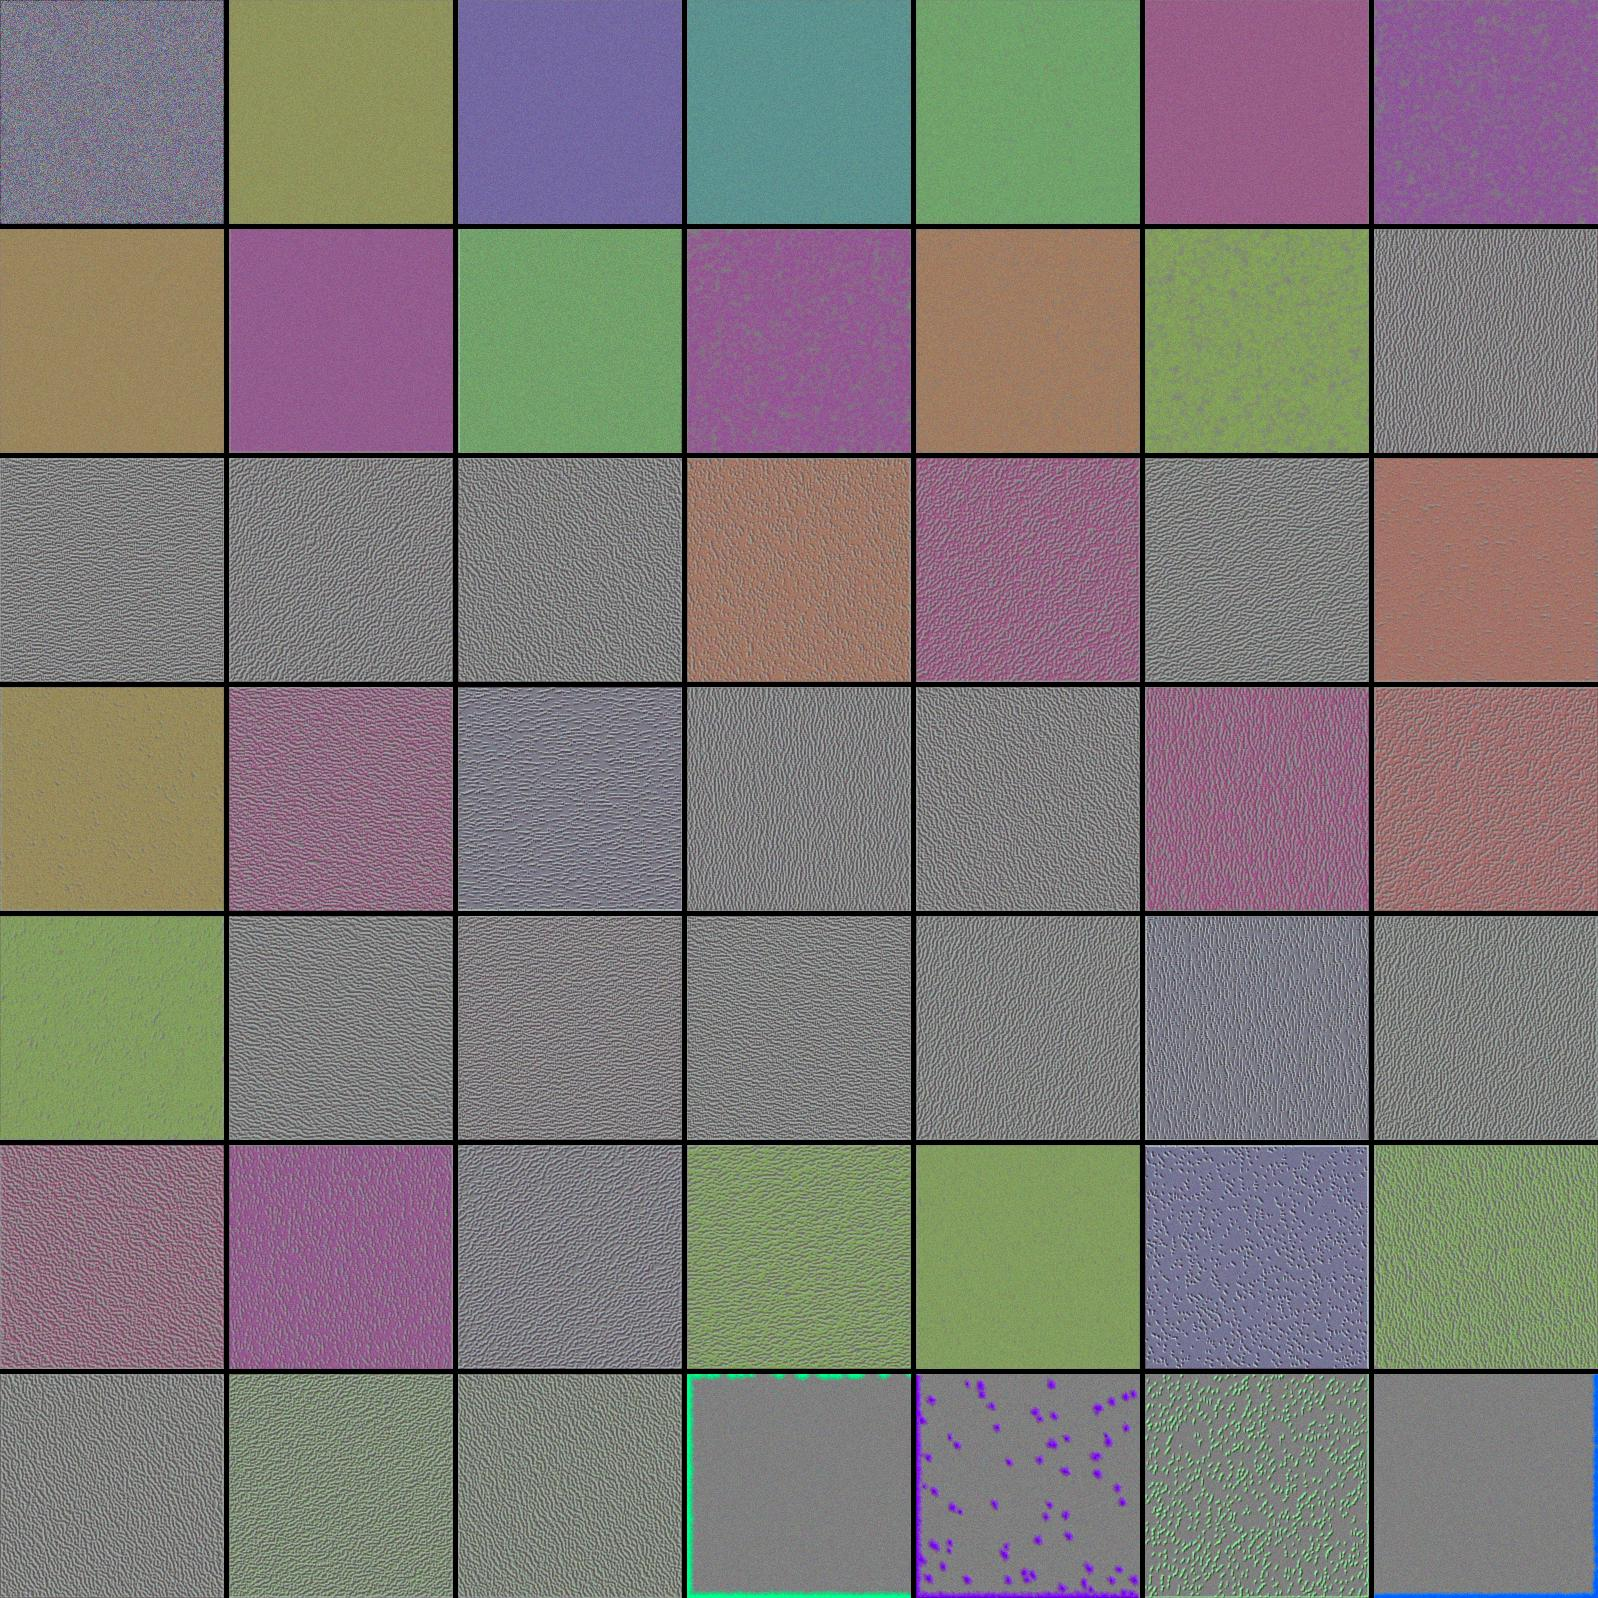

In [6]:
#visualization of the first convolutional layer of VGG16
filters_vissed=Image(data="test_vis_func.jpg")
display(filters_vissed)

## SVM from skLearn

In [10]:
# create a classifier with default settings with sklearn
clf=svm.SVC(probability=True) 
clf.fit(train_features,train_labels);


In [11]:
#Best parameters thus far
clf_tune=svm.SVC(gamma=.001,C=1000) 
clf_tune.fit(train_features,train_labels)
#Testing the accuraccy of the SVM
print('Training Accuracy of SVM(C=1000, gamma=.001): ',clf_tune.score(train_features,train_labels))
print('Testing Accuracy of SVM(C=1000, gamma=.001): ',clf_tune.score(test_features,test_labels))

Training Accuracy of SVM(C=1000, gamma=.001):  1.0
Testing Accuracy of SVM(C=1000, gamma=.001):  0.9


In [12]:
clf_lin=svm.LinearSVC(C=.0069)
clf_lin.fit(train_features,train_labels);
#Testing the accuraccy of the SVM
print('Training Accuracy of linear SVM(C=1, gamma=.0069): ',clf_lin.score(train_features,train_labels))
print('Testing Accuracy of linear SVM(C=1, gamma=.0069): ',clf_lin.score(test_features,test_labels))

Training Accuracy of linear SVM(C=1, gamma=.0069):  0.9340937896070975
Testing Accuracy of linear SVM(C=1, gamma=.0069):  0.8555555555555555


In [13]:
#now we rejoin the test and training sets to see accuracy over the whole data set
features=np.concatenate((train_features,test_features))
labels=np.concatenate((train_labels,test_labels))
labels=np.expand_dims(labels,1)

combined=np.concatenate((features,labels),axis=1)
shuffle(combined)
combined=np.array(combined)

features=np.split(combined,[4096],axis=1)[0]
labels=np.split(combined,[4096],axis=1)[1]


In [14]:
#this processes the data in batches and we will use this to get an average accuracy
model=clf_lin
n=len(features)
batch_size=32 
accuracy_list=[]
start=0 #start of the batch
while start<n:
    if start+batch_size<=n:
        end=start+batch_size
    else:
        end=n
    batch=features[start:end]
    batch_label=labels[start:end]
    acc=model.score(batch,batch_label)
    accuracy_list.append(acc)
    start=end
#current script does not account for the potential of the batch sizes to be different
#combines training and testing data

In [15]:
acc_arr=np.array(accuracy_list)
mean_acc=acc_arr.mean()
print("The mean accuracies of these trials are: ", mean_acc)

The mean accuracies of these trials are:  0.9352678571428571


In [16]:
#in comparing the above we observe slight overfitting in the tuned SVM when compared to the Linear Classifier. 

In [17]:
#not yet fully implemented
def test_model_svm(data,lables,model,give_confidence=False):
    """
    Tests a trained binary classification model on a test set of data, with a corresponding list oflables. 
    The model makes a prediction on the data, and records which images are misclassified and as what, and 
    returns this data as lists. 
    
    
    
    Input:
    ------------------
    model: an sklearn svm
    
    data: a list preprocessed numpy arrays which are valid inputs for the model
    
    lables: a list the same lenght as data such that the ith item in data had the same label as the ith 
    element in lables. This list has values 0 or 1
            
    give_confidence: if this is true, the model also returns the confidence of the classifcation.
            
    Output: (pred_1_but_0,pred_0_but_1,conf)
    --------------------
    
    MisClassified_0: list of indices whose classification was labled 1, but the expected output was 0
     
    MisClassified_1: "     "     "       "     "        "      "     0    "    "        "       "   1
    
    conf: an array of 
    
    """
    MisClassified_0=[]
    MisClassified_1=[]
    
    
    for i, arr in enumerate(data):
        arr=np.expand_dims(arr,0)
        prediction=model.predict(arr)
        if not prediction==lables[i]:
            if lables[i]==0: #if the expected label is 0
                MisClassified_0.append(i)
            else:
                MisClassified_1.append(i)
    if give_confidence:
        conf=model.predict(data)
        return MisClassified_0, MisClassified_1, conf
    else:
        return MisClassified_0, MisClassified_1

In [18]:
train_set.class_indices

{'Not-Precip': 0, 'Precip': 1}

In [19]:
#data=np.concatenate((train_features,test_features))
#labels=np.concatenate((train_labels,test_labels))

data=test_features
labels=test_labels
Misclassified_nonPrecip, Misclassified_Precip =test_model_svm(data, labels, clf_tune, give_confidence=False)

In [ ]:
for index in Misclassified_Precip:  #displays images labeled precip, but predicted non-precip
    if labels[index] == 0:
        display_NParray(test_data[index])

In [ ]:
for index in Misclassified_nonPrecip: #displays images labeled non-precip, but predicted precip
    if labels[index] == 1:
        display_NParray(test_data[index])

[[39  6]
 [ 3 42]]


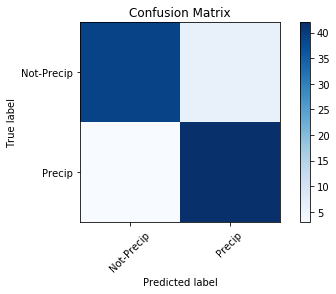

In [23]:
classes=dict_to_list(test_set.class_indices)
print(plot_confusion_matrix(clf_tune, data, labels, classes))
plt.savefig("images/CM_VGG16_SVMlin")

## SVM through training final layer with hinge loss

In [52]:
# First attempt at using keras training to create an SVM



from keras.regularizers import l2
#freeze all other layers 
for layer in Feat_extract.layers:
    layer.trainable=False

    
test_labels_SVM=test_labels*2-1 #makes lables in {1,-1} as mentioned in https://github.com/keras-team/keras/issues/2588
train_labels_SVM=train_labels*2-1

SVM_trans_layers=Feat_extract.layers

#add a linear dense layer
SVM_trans_layers.append(Dense(1,activation='tanh', kernel_regularizer=l2(.001)))

SVM_trans_VGG=Sequential(layers=SVM_trans_layers)
SVM_trans_VGG.compile(loss='hinge',optimizer='adam',metrics=['accuracy'])

In [70]:
SVM_trans_VGG.fit(data,labels, validation_split=0.1,batch_size=32,epochs=10,shuffle=True)

Train on 791 samples, validate on 88 samples
Epoch 1/10
791/791 [==============================] - 337s 426ms/step - loss: 0.5007 - acc: 0.5019 - val_loss: 0.5131 - val_acc: 0.4886
Epoch 2/10
791/791 [==============================] - 330s 418ms/step - loss: 0.4998 - acc: 0.5019 - val_loss: 0.5130 - val_acc: 0.4886
Epoch 3/10
791/791 [==============================] - 335s 424ms/step - loss: 0.4997 - acc: 0.5019 - val_loss: 0.5130 - val_acc: 0.4886
Epoch 4/10
791/791 [==============================] - 345s 436ms/step - loss: 0.4997 - acc: 0.5019 - val_loss: 0.5129 - val_acc: 0.4886
Epoch 5/10
791/791 [==============================] - 356s 450ms/step - loss: 0.4996 - acc: 0.5019 - val_loss: 0.5128 - val_acc: 0.4886
Epoch 6/10
791/791 [==============================] - 356s 450ms/step - loss: 0.4996 - acc: 0.5019 - val_loss: 0.5128 - val_acc: 0.4886
Epoch 7/10
791/791 [==============================] - 355s 449ms/step - loss: 0.4995 - acc: 0.5019 - val_loss: 0.5127 - val_acc: 0.4886
Epo

In [20]:
# We now try to see what happens if we take out SVM and begin to train different layers from the top down

In [2]:

from keras import backend as K
from keras.engine.topology import Layer
import tensorflow as tf
import numpy as np



class LinearSVM(Layer):
    """
    This layer takes a 2D Tensor (batch,features), and outputs the results of a SVM applied to that Tensor, returning 
    a 1D tensors of predictions of size (batch).
    
    The SVM to be used is a LinearSVM implemented in sklearn
    """
    def __init__(self, coef, intercept, **kwargs):
        self.coef=coef
        self.intercept=intercept
        self.use_bias=False
        self.trainable=False
        super(LinearSVM, self).__init__(**kwargs)
        

        
    def build(self, input_shape):
        """
        We expect an input shape of the form (batch,row,column,channel)
        TODO: allow for channel-first functionality 
        
        if we have our constant parameter set to true, then we shall make our kernel a normalized 
        """
        #for some reason the config file with save the np_arrays as dictionaries of the form
        #{"type":ndarray, "value":<actual array> } so this code allow the model to load from configure
        if isinstance(self.coef,dict): 
            self.coef=self.coef['value']
        if isinstance(self.intercept,dict):  
            self.intercept=self.intercept['value']
            
        self.kernel=K.variable(self.coef)
        self.kernel=K.transpose(self.kernel)
        self.intercept_const=K.variable(self.intercept) 
        super(LinearSVM, self).build(input_shape)  # Be sure to call this at the end
        
    def call(self, x):
        
        return (K.dot(x, self.kernel)+self.intercept_const)
    
    def get_config(self):
        config={"coef":self.coef,"intercept":self.intercept}
        base_config = super(LinearSVM, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))
        

    def compute_output_shape(self, input_shape):
        return (input_shape[0],1)

In [186]:


#Create layers
In=Input(shape=(4096,))
test_LinSVM=LinearSVM(clf_lin.coef_,clf_lin.intercept_)(In)
predictions=Activation('tanh')(test_LinSVM)
SVMlin=Model(inputs=In, outputs=predictions )


In [ ]:
pred_conf=SVMlin.predict(data)
pred_keras=(pred_conf>0).astype('float32')
pred_sk=clf_lin.predict(data)
for i in range(len(pred_conf)):
    if(pred_keras[i][0]==pred_sk[i]):
        print(i)
#as shown below, the current model (in these cases) projects the same accuracy 

In [70]:
LinSVM=LinearSVM(clf_lin.coef_,clf_lin.intercept_)(Feat_extract.output)
predictions=Activation('tanh')(LinSVM)
VGG16_SVM=Model(inputs=Feat_extract.inputs, outputs=predictions)

In [72]:
VGG16_SVM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [73]:
pred_conf=VGG16_SVM.predict(test_data)

In [75]:
pred_keras=(pred_conf>0).astype('float32')
pred_sk=clf_lin.predict(test_features)
wrong=0
for i in range(len(pred_conf)):
    if not pred_keras[i][0]==pred_sk[i]:
        wrong+=1
        print(i,'th prediction is incorrect') #only prints if there is a different classification than the 
                                              # linear classifier
print(wrong)

0


In [77]:
for layers in VGG16_SVM.layers:
    layers.trainable=False
VGG16_SVM.layers[-3].trainable=True

In [78]:
VGG16_SVM.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [79]:
VGG16_SVM.save('models_LFS/VGG16_SVMlin_1.0.h5')

/Users/jack/Desktop/Deliverables


In [13]:
MyLayer={"LinearSVM":LinearSVM}
test_load=keras.models.load_model('models_LFS/VGG16_SVMlin_1.0.h5',custom_objects=MyLayer)

/Users/jack/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
test_load.predict_generator(test_set,steps=90) # test of prediction of linear SVM with VGG16

In [ ]:
# As of now we have a pipeline which takes a keras model base and appends to the end an SVM, trained independently
# in SKlearn. We have yet to fully test a training procedure on this model. 

In [30]:
Val_Acc=[]
Train_Acc=[]
num_trials=20
for i in range(num_trials):
    #now we run the featur# extractor
    #generate data from files
    train_datagen=image.ImageDataGenerator( rescale=1/255,
                                       shear_range=0.2, zoom_range=0.2, horizontal_flip= True)
    test_datagen=image.ImageDataGenerator(rescale=1/255)
    train_set=train_datagen.flow_from_directory('Data_set1/Training', target_size=(224,224),
                                                batch_size=789, class_mode='sparse')
    test_set=test_datagen.flow_from_directory('Data_set1/Test', target_size=(224,224), 
                                              batch_size=90, class_mode="sparse")
    
    #generate the numpy arrays from the generators
    train_data=train_set[0][0]
    train_labels=train_set[0][1]

    test_data=test_set[0][0]
    test_labels=test_set[0][1]  
    
    
    test_features=Feat_extract.predict(test_data)  
    train_features=Feat_extract.predict(train_data)
    
    clf_lin=svm.LinearSVC(C=.0069)
    clf_lin.fit(train_features,train_labels);
    
    train_acc=clf_lin.score(train_features,train_labels)
    test_acc=clf_lin.score(test_features,test_labels)
    
    Val_Acc.append(test_acc)
    Train_Acc.append(train_acc)
    
    print('Training Accuracy of linear SVM(C=1, gamma=.0069): ',train_acc)
    print('Testing Accuracy of linear SVM(C=1, gamma=.0069): ',test_acc)
    


Found 789 images belonging to 2 classes.
Found 90 images belonging to 2 classes.
Training Accuracy of linear SVM(C=1, gamma=.0069):  0.9404309252217997
Testing Accuracy of linear SVM(C=1, gamma=.0069):  0.8444444444444444
Found 789 images belonging to 2 classes.
Found 90 images belonging to 2 classes.
Training Accuracy of linear SVM(C=1, gamma=.0069):  0.9366286438529785
Testing Accuracy of linear SVM(C=1, gamma=.0069):  0.8777777777777778
Found 789 images belonging to 2 classes.
Found 90 images belonging to 2 classes.
Training Accuracy of linear SVM(C=1, gamma=.0069):  0.9391634980988594
Testing Accuracy of linear SVM(C=1, gamma=.0069):  0.8666666666666667
Found 789 images belonging to 2 classes.
Found 90 images belonging to 2 classes.
Training Accuracy of linear SVM(C=1, gamma=.0069):  0.9416983523447402
Testing Accuracy of linear SVM(C=1, gamma=.0069):  0.8777777777777778
Found 789 images belonging to 2 classes.
Found 90 images belonging to 2 classes.
Training Accuracy of linear SVM

In [34]:
print(mean_Val_Acc)
print(mean_Train_Acc)

0.8616666666666667
0.9394803548795944


In [ ]:
#Current status: 
#we have constructed a feature extractor from a base keras model (use case VGG16)
#We have also used these extractors in a pipline to train several different SVMs
#We converted the keras=> sklearn pipeline into a full keras model by implementing linear SVM layer
#
#TODO:
#fix SVM layer so that we can train the model
#try other bases to compare results
#get GPU and larger amount of data so that we can try base initialization of a pretrained model. 